# Preprocessing

Storing images and masks already preprocessed

In [1]:
from recognizer.utils. constants import DATA_DIR

ANNOTATIONS_DIR = DATA_DIR / "annotations"
IMAGES_DIR = DATA_DIR / "images"

PREPROCESSED_IMAGES_DIR = DATA_DIR / "preprocessed-10p" / "images"
PREPROCESSED_MASKS_DIR = DATA_DIR / "preprocessed-10p" / "masks"

IMAGE_INPUT_SIZE = (1920, 1080) # PIL uses (W, H)
IMAGE_OUTPUT_SIZE = (192, 109) # NumPy uses (H, W)

N = 512

## Masks

In [2]:
import os

os.makedirs(PREPROCESSED_MASKS_DIR, exist_ok=True)

In [3]:
import json

with open(ANNOTATIONS_DIR / "instances_default.json") as f:
    annotations = json.load(f)

In [4]:
image_id_map = {a["id"]: a["file_name"] for a in annotations["images"]}

In [5]:
import numpy as np

masks = np.zeros((N, IMAGE_OUTPUT_SIZE[1], IMAGE_OUTPUT_SIZE[0]), dtype=bool)

masks.shape

(512, 109, 192)

In [6]:
from PIL import Image, ImageDraw

for annotation in annotations["annotations"]:
    img_id = annotation["image_id"]
    mask = Image.new("1", IMAGE_INPUT_SIZE)
    mask_draw = ImageDraw.ImageDraw(mask, "1")

    segmentation = annotation["segmentation"][0]
    mask_draw.polygon(segmentation, fill=1)

    mask = mask.resize(IMAGE_OUTPUT_SIZE)

    bool_array = np.array(mask) > 0

    masks[img_id - 1] = masks[img_id - 1] | bool_array

In [7]:
masks.shape

(512, 109, 192)

In [8]:
for i in range(N):
    mask_path = os.path.join(PREPROCESSED_MASKS_DIR, f"mask_{str(i).zfill(4)}.npy")
    np.save(mask_path, masks[i])

# Images

In [9]:
os.makedirs(PREPROCESSED_IMAGES_DIR, exist_ok=True)

In [10]:
images = np.zeros((N, IMAGE_OUTPUT_SIZE[1], IMAGE_OUTPUT_SIZE[0], 3), dtype=np.uint8)

images.shape

(512, 109, 192, 3)

In [11]:
for img_id, img_filename in image_id_map.items():
    img = Image.open(str(IMAGES_DIR / img_filename))
    img = img.resize(IMAGE_OUTPUT_SIZE)
    img = np.array(img)
    images[img_id - 1] = img

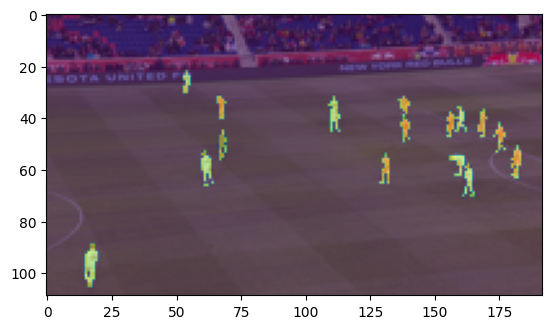

In [12]:
import matplotlib.pyplot as plt

plt.imshow(images[0])
plt.imshow(masks[0], alpha=0.5)

In [13]:
for i in range(N):
    img_path = os.path.join(PREPROCESSED_IMAGES_DIR, f"image_{str(i).zfill(4)}.npy")
    np.save(img_path, images[i])